For animations of Gradient Descent -https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day51-gradient-descent/animation9.gif

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20 , random_state=20)

In [5]:
x,y

(array([[-1.62950152e+00],
        [-5.13145106e-01],
        [-1.41666675e+00],
        [ 1.56763255e+00],
        [ 5.54274933e-01],
        [-5.55185797e-01],
        [ 1.35179619e+00],
        [-1.55110074e+00],
        [-2.28321031e-01],
        [-8.42367934e-01],
        [-4.93410882e-01],
        [ 5.27728470e-01],
        [ 6.91002119e-01],
        [ 1.33277821e+00],
        [ 2.05983800e+00],
        [ 9.87886147e-02],
        [ 4.87402961e-01],
        [ 1.35778902e+00],
        [ 3.81924687e-02],
        [-1.61299022e+00],
        [-2.19661122e-01],
        [-4.04534024e-01],
        [ 3.57536516e-01],
        [ 1.55838222e-01],
        [-8.28692770e-01],
        [ 9.39469350e-01],
        [-1.48238505e+00],
        [ 3.23461010e-01],
        [ 1.95865022e-01],
        [-2.06694872e+00],
        [-1.90146405e+00],
        [-1.48571961e+00],
        [ 5.27069718e-01],
        [ 3.20970784e-01],
        [ 1.05110868e+00],
        [ 9.89486559e-01],
        [-2.43338766e-01],
 

In [3]:
x.shape,y.shape

((100, 1), (100,))

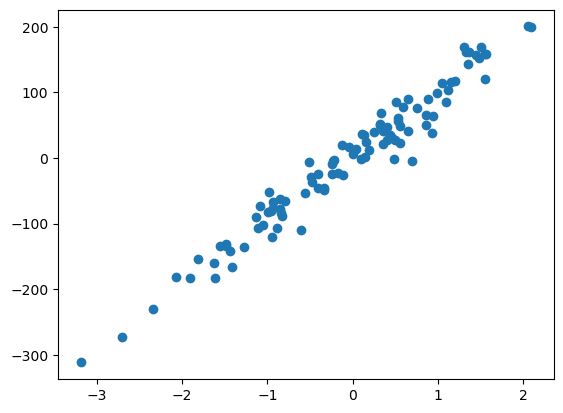

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.coef_)
print(lr.intercept_)

ypred = lr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

[95.32476501]
2.8209156086280234


0.9727848758778775

### The problem we were facing in below class implementation is that integer is overflowing on larger epochs so we need to take the mean squared error function instead of the squared error function 

In [44]:
# our own implemented class for GD

class Gd:
    
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.slope = -150
        self.intercept = 200
    
    def fit(self,xtrain,ytrain):
        #cost func = sigma (yi-mxi-b)^2 / n 
        #slope_der = del cost func / del slope = -2* sigma(yi-mxi-b)*xi
        #intercept_der = del cost func / del intercept
        n = xtrain.shape[0]
        for i in range(self.epochs):
            intercept_der = -2 * np.mean(ytrain - self.slope*xtrain.ravel()-self.intercept)
            slope_der = -2* np.sum((ytrain- self.slope*xtrain.ravel() - self.intercept) * xtrain.ravel())/n
        
            self.intercept = self.intercept - self.lr * intercept_der
            self.slope = self.slope - self.lr * slope_der
        print(self.slope, self.intercept)
    def predict(self,xtest):
        return (self.slope*xtest) + self.intercept
        

In [58]:
gd = Gd(0.05, 110)
gd.fit(xtrain,ytrain)
pred = gd.predict(xtest)
#print(gd.intercept)
#print(gd.slope)
print(r2_score(ytest,pred))

95.32448857741595 2.8223663059698785
0.9727840045545095


In [19]:
xtrain.shape

(80, 1)

The empty tuple indicates that the array has no dimensions, meaning it's a scalar (0-dimensional). Scalars are treated as single values rather than as arrays with dimensions, hence they have no shape.

In [15]:
np.array(1).shape # scalars have no shape

()

In [33]:
slope = -150
intercept = 200

for i in range(500):
    # slope w.r.t. beta knot 
    intercept_der = np.sum(ytrain - slope*xtrain.ravel()-intercept)#.shape

    # slope w.r.t. Beta 1
    slope_der = -2* np.sum((ytrain - slope*xtrain.ravel() - intercept) * xtrain.ravel())

    #coefficients updation 
    # here lr = 0.05
    intercept = intercept - (0.05 * intercept_der)
    slope = slope - (0.05 * slope_der)

C:\Users\dell\AppData\Local\Temp\ipykernel_9696\3698954598.py:14: RuntimeWarning: invalid value encountered in double_scalars
  slope = slope - (0.05 * slope_der)


In [34]:
intercept, slope

(nan, nan)

In [19]:
np.sum(ytrain - (-150)*xtrain.ravel()-(200)).shape

()

In [11]:
(ytrain - 100*xtrain.ravel()-(-120)).shape

(80,)

Below is without taking the mean , so it overflows on larger values of epoch

In [37]:
# below code directly from campusx:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [41]:
gd = GDRegressor(0.05, 1500)
gd.fit(xtrain,ytrain)
#print(gd.b)
#print(gd.m)

nan nan


C:\Users\dell\AppData\Local\Temp\ipykernel_9696\2231519698.py:12: RuntimeWarning: overflow encountered in double_scalars
  loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
C:\Users\dell\AppData\Local\Temp\ipykernel_9696\2231519698.py:12: RuntimeWarning: invalid value encountered in subtract
  loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
C:\Users\dell\AppData\Local\Temp\ipykernel_9696\2231519698.py:13: RuntimeWarning: invalid value encountered in subtract
  loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
